In [73]:
import requests
from bs4 import BeautifulSoup

In [74]:
url = "https://www.cervantesvirtual.com/obra-visor/el-principe--1/html/0005364a-82b2-11df-acc7-002185ce6064_88.html"
contenido = requests.get(url).text

In [ ]:
print(contenido)

In [76]:
soup = BeautifulSoup(contenido, "html.parser")

In [77]:
parrafos = soup.find_all("p")

In [ ]:
print(parrafos)

In [78]:
h1 = soup.find_all("h1")

In [79]:
print(h1)

[<h1 class="sr-only">Visor de obras.</h1>, <h1 class="tit">El príncipe</h1>]


In [80]:
italicas = soup.find_all("i")

In [81]:
print(italicas) #No contiene italicas

[]


In [82]:
from collections import Counter

In [83]:
parrafos = str(soup.find_all("p"))

In [84]:
print(parrafos.count("príncipe"))

83


In [85]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [86]:
buscar_palabra("estado")
buscar_palabra("pueblo")
buscar_palabra("leyes")
buscar_palabra("poder")

Encontraste la palabra 'estado' 67 veces
Encontraste la palabra 'pueblo' 39 veces
Encontraste la palabra 'leyes' 8 veces
Encontraste la palabra 'poder' 37 veces


## Algo divertido

In [87]:
import random

In [88]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [89]:
print("\nLee un pasaje aleatorio de El principe")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de El principe
-------------------------------------------
Como esta parte de
la vida de este duque merece estudiarse, y aun imitarse por otros,
no quiero dejar de exponerla con alguna
especificación164.
-------------------------------------------
Este párrafo tiene 24 palabras.


## Visualizaciones interesantes


In [90]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [91]:
import matplotlib.pyplot as plt

In [92]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

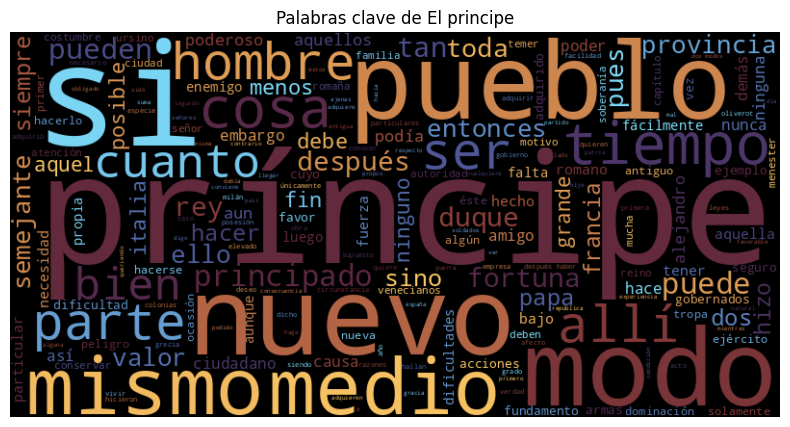

In [94]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='cyan', colormap='managua').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de El principe')
plt.show()

In [95]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'si', 'bien', 'allí', 'modo', 'ello',
        'cosa', 'aun', 'vez', 'aquel', 'cuanto'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

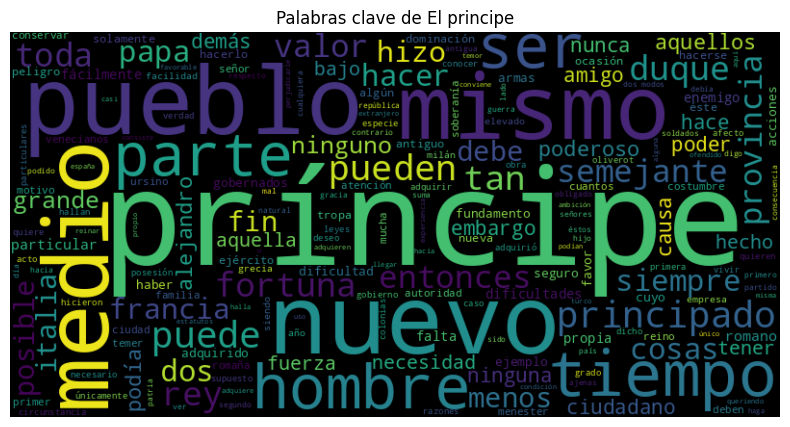

In [96]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de El principe')
plt.show()